> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: No-Show Appointment

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
A person makes a doctor appointment, receives all the instructions and no-show. 
We want to know :-

Are no-show appointments associated with a certain gender?

What are the most hospitals where appointments are reserved, and which one is more present for their appointments?

Do SMS reminders decrease the number of absences?

Is the period between scheduled day and appointment day affecting the number of no-show appointments?

Do Scholarship reminders increase the number of absences?

In [2]:
# import statements for all of the packages that i plan to use.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [3]:
# Loading my data and print out a few lines.
df = pd.read_csv('No-show_appointment.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
# Perform operations to inspect data
df.shape

(110527, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [6]:
# Create function to Convert data type for ScheduledDay 
# and AppointmentDay columns from odject to date

def Convert_date(date):
    return  pd.to_datetime(date, format='%d%b%Y', infer_datetime_format=True).dt.date

df['ScheduledDay'] = Convert_date(df['ScheduledDay'])
df['AppointmentDay']  = Convert_date(df['AppointmentDay'])

### Data Cleaning : Convert datatypes ,, Rename columns ,, Drop columns ,, Drop ages with 0 years old

In [7]:
#Convert data type for ScheduledDay and AppointmentDay columns from odject to date
df['ScheduledDay'] =  pd.to_datetime(df['ScheduledDay'], format='%d%b%Y', infer_datetime_format=True).dt.date
df['AppointmentDay'] =  pd.to_datetime(df['AppointmentDay'], format='%d%b%Y', infer_datetime_format=True).dt.date

In [8]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [9]:
df.shape

(110527, 14)

In [10]:
#Changing data type of PatientId from float to int
df['PatientId'] = df['PatientId'].astype(int)
#df['PatientId'] = pd.to_numeric(df['PatientId'], downcast='integer')

In [11]:
# Rename for No-show column to be No_show
df.rename(columns={'No-show':'No_show'}, inplace=True)

In [12]:
#drop columns that won't be used
df.drop(['PatientId','AppointmentID'], axis=1, inplace=True)

In [13]:
df0_18 = df[(df['Age'] > 0) & (df['Age'] <= 18) & (df["No_show"] == 'No')]
df19_34 = df[(df['Age'] <= 34) & (df['Age'] > 18) & (df["No_show"] == 'No')]
df35_60 = df[(df['Age'] <= 60) & (df['Age'] > 34) & (df["No_show"] == 'No')]
df61_100 = df[(df['Age'] > 60) & (df['Age'] > 60) & (df["No_show"] == 'No')]

print(df0_18.shape , df19_34.shape , df35_60.shape , df61_100.shape)

(19619, 12) (17295, 12) (31637, 12) (16756, 12)


### Exploration

### We used The correlation matrix to estimate the linear historical relationship between the returns of multiple assets. 

In [15]:
# Plot correlation matrix for the dataframe
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
Age,1.000000,-0.092457,0.504586,0.292391,0.095811,0.078033,0.012643
Scholarship,-0.092457,1.000000,-0.019729,-0.024894,0.035022,-0.008586,0.001194
Hipertension,0.504586,-0.019729,1.000000,0.433086,0.087971,0.080083,-0.006267
Diabetes,0.292391,-0.024894,0.433086,1.000000,0.018474,0.057530,-0.014550
Alcoholism,0.095811,0.035022,0.087971,0.018474,1.000000,0.004648,-0.026147
Handcap,0.078033,-0.008586,0.080083,0.057530,0.004648,1.000000,-0.024161
SMS_received,0.012643,0.001194,-0.006267,-0.014550,-0.026147,-0.024161,1.000000


### Research Question 1 :
### Are no-show appointments associated with a certain gender?

### Answer
### We observe that most of people reserve are females and most of people attend are females and most of people don't attend are Females

In [13]:
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [14]:
# I Separate the dataframe into males and females
dfMale= df[df['Gender'] == 'M']
dfFem = df[df['Gender'] == 'F']

In [15]:
dfMale.shape

(38687, 12)

In [16]:
dfFem.shape

(71840, 12)

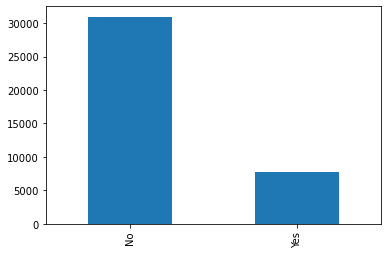

In [17]:
dfMale['No_show'].value_counts().plot.bar()

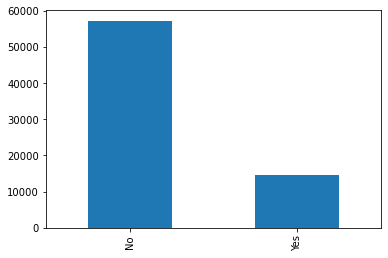

In [18]:
dfFem['No_show'].value_counts().plot.bar()

### Research Question 2  
### What are the most hospitals where appointments are reserved, and which one is more present for their appointments¶

### Answer
### JARDIM CAMBURI is the most for both

In [19]:
# Which hospitals people reserve appointments in it
df['Neighbourhood'][df['No_show']=='No'].value_counts()

JARDIM CAMBURI       6252
MARIA ORTIZ          4586
RESISTÊNCIA          3525
JARDIM DA PENHA      3246
SANTA MARTHA         2635
                     ... 
PONTAL DE CAMBURI      57
ILHA DO BOI            32
ILHA DO FRADE           8
AEROPORTO               7
PARQUE INDUSTRIAL       1
Name: Neighbourhood, Length: 80, dtype: int64

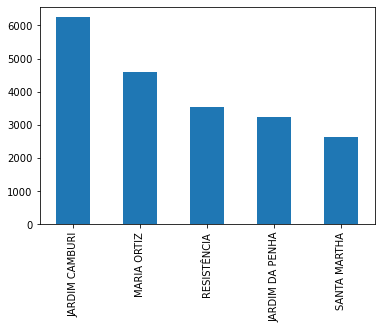

In [20]:
df['Neighbourhood'][df['No_show']=='No'].value_counts().head().plot(kind='bar')

In [21]:
df['Neighbourhood'][df['No_show']=='Yes'].value_counts()

JARDIM CAMBURI                 1465
MARIA ORTIZ                    1219
ITARARÉ                         923
RESISTÊNCIA                     906
CENTRO                          703
                               ... 
PONTAL DE CAMBURI                12
ILHA DO BOI                       3
ILHAS OCEÂNICAS DE TRINDADE       2
ILHA DO FRADE                     2
AEROPORTO                         1
Name: Neighbourhood, Length: 80, dtype: int64

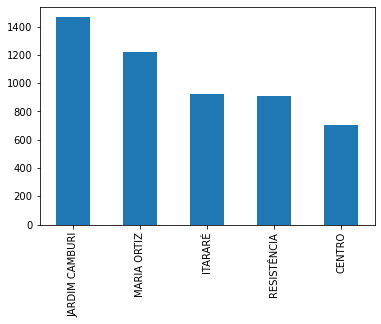

In [22]:
df['Neighbourhood'][df['No_show']=='Yes'].value_counts().head().plot(kind='bar')

<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 3 :
### Do SMS reminders decrease the number of absences?

### Answer
### Most of people that didn't receive message didn't attend ,,, And most of people attend didn't received SMS. 

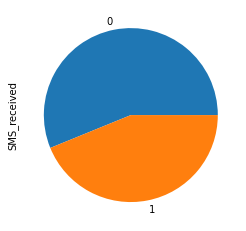

In [23]:
df['SMS_received'][(df['No_show']=='Yes')].value_counts().head().plot(kind='pie')

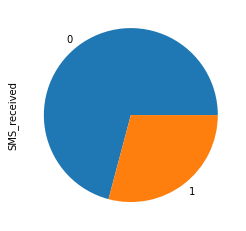

In [24]:
df['SMS_received'][(df['No_show']=='No')].value_counts().head().plot(kind='pie')

<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 4 :
### Is the period between scheduled day and appointment day affecting the number of no-show appointments?

### Answer
### there are most of people attend at AppointmentDay differ from ScheduledDay but there is small number of people didn't attend at AppointmentDay when they reserve at the same day compared with when they reserve in another day

In [17]:
df.head(2)

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No


In [18]:
total_rows = df.shape[0]

In [19]:
attendSameTime = 0
NoShowSameTime = 0

attendDifTime = 0
NoShowDifTime = 0

for n in range (total_rows) :
    if(df['ScheduledDay'][n]==df['AppointmentDay'][n]):
        if(df['No_show'][n]=='No'):
            attendSameTime += 1
        else :
            NoShowSameTime += 1
    else :
        if(df['No_show'][n]=='No'):
            attendDifTime += 1
        else :
            NoShowDifTime += 1
            
print(attendSameTime, NoShowSameTime, attendDifTime, NoShowDifTime)

36771 1792 51437 20527


## Exploratory Data Analysis


### Research Question 5 :
### Do Scholarship reminders increase the number of absences?

### Answer
### Most of people attend don't have a Scholarship

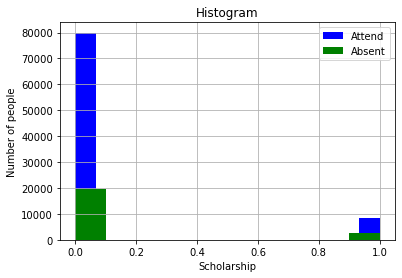

In [28]:
plt.hist(df.Scholarship[df.No_show == 'No'] , 15, facecolor='b',alpha=1, label='Attend')
plt.hist(df.Scholarship[df.No_show == 'Yes'] , 10, facecolor='g',alpha=1, label='Absent')
plt.legend()
plt.xlabel('Scholarship')
plt.ylabel('Number of people')
plt.title('Histogram')
plt.grid(True)

<a id='conclusions'></a>
## Conclusions

Results : Our data Suggest that
 1. There isn't big difference between the distribution of age between patients who showed uo for the appointment versus the patients that didn't show up for the appointment and the most is females .
 2. There is a higher percentage of people that received an SMS and didn't show up when compared to people who received an SMS and did show up.
 3. Being enrolled in the scholarship program doesn't seem to be make people more likely to show up to the oppointment.
 4. JARDIM CAMBURI is the most hospital for reservation and attendance.
 5. there are most of people attend at AppointmentDay differ from ScheduledDay but there is small number of people didn't attend at AppointmentDay when they reserve at the same day compared with when they reserve in another day.
 
 Limitations: There are a couple of limitationd with our data:
 1. Most of variables are categorical, which doesn't allow for a high level of statistical method that can be used to provide correlations
 2. Can't show strong correlations between factors since most of our data is categorical.
 3. We don't have many details for certain factors to draw conclusions.

In [29]:
df.to_csv('No-show_appointment_edited.csv',index=False)